In [40]:
from medgan_model import Medgan
from Data_loader import load_satellite_data
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import KFold

In [41]:
from medgan_model import Medgan
from Data_loader import load_satellite_data
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold

In [42]:
# --- Load and preprocess real shuttle data ---
df = pd.read_csv("F:\\Assisgments\\team project A\\Models\\MedGAN Areeb\\Datasets\\satellite_encoded.csv", header=None)
X_real = df.iloc[:, :-1]
y_real = df.iloc[:, -1]

In [43]:
X_train, X_test, y_train, y_test = load_satellite_data("F:\\Assisgments\\team project A\\Models\\MedGAN Areeb\\Datasets\\satellite_encoded.csv", test_size=0.2, n_shuffle=10)
input_dim = X_train.shape[1]

In [44]:
# --- Apply 5-Fold Cross Validation ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"\n===== Fold {fold+1} of 5 =====")
    
    # Prepare train and validation split
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    
    # Now use X_tr for training instead of X_train


===== Fold 1 of 5 =====

===== Fold 2 of 5 =====

===== Fold 3 of 5 =====

===== Fold 4 of 5 =====

===== Fold 5 of 5 =====


In [45]:
# --- Initialize and Train MedGAN ---
medgan = Medgan(input_dim=input_dim, ae_loss_type='bce')
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
batch_size = 64
n_epochs = 300

for epoch in range(n_epochs):
    np.random.shuffle(X_tr)
    for i in range(0, len(X_tr), batch_size):
        batch = X_tr[i:i + batch_size]
        noise = np.random.normal(size=(batch.shape[0], medgan.random_dim))
        medgan.train_step(batch, noise)
    print(f"Epoch {epoch+1}/{n_epochs} completed")

c:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/300 completed
Epoch 2/300 completed
Epoch 3/300 completed
Epoch 4/300 completed
Epoch 5/300 completed
Epoch 6/300 completed
Epoch 7/300 completed
Epoch 8/300 completed
Epoch 9/300 completed
Epoch 10/300 completed
Epoch 11/300 completed
Epoch 12/300 completed
Epoch 13/300 completed
Epoch 14/300 completed
Epoch 15/300 completed
Epoch 16/300 completed
Epoch 17/300 completed
Epoch 18/300 completed
Epoch 19/300 completed
Epoch 20/300 completed
Epoch 21/300 completed
Epoch 22/300 completed
Epoch 23/300 completed
Epoch 24/300 completed
Epoch 25/300 completed
Epoch 26/300 completed
Epoch 27/300 completed
Epoch 28/300 completed
Epoch 29/300 completed
Epoch 30/300 completed
Epoch 31/300 completed
Epoch 32/300 completed
Epoch 33/300 completed
Epoch 34/300 completed
Epoch 35/300 completed
Epoch 36/300 completed
Epoch 37/300 completed
Epoch 38/300 completed
Epoch 39/300 completed
Epoch 40/300 completed
Epoch 41/300 completed
Epoch 42/300 completed
Epoch 43/300 completed
Epoch 44/300 complet

In [46]:
medgan = Medgan(input_dim=input_dim, ae_loss_type='bce')
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)

In [47]:
# --- Apply 5-Fold Cross Validation ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"\n===== Fold {fold+1} of 5 =====")
    
    # Prepare train and validation split
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    
    # Now use X_tr for training instead of X_train


===== Fold 1 of 5 =====

===== Fold 2 of 5 =====

===== Fold 3 of 5 =====

===== Fold 4 of 5 =====

===== Fold 5 of 5 =====


In [48]:
# --- Training Loop ---
ae_losses, d_losses, g_losses = [], [], []

for epoch in range(n_epochs):
    np.random.shuffle(X_tr)
    for i in range(0, len(X_tr), batch_size):
        batch = X_tr[i:i + batch_size]
        noise = np.random.normal(size=(batch.shape[0], medgan.random_dim))
        ae_loss, d_loss, g_loss = medgan.train_step(batch, noise)

    ae_losses.append(ae_loss.numpy())
    d_losses.append(d_loss.numpy())
    g_losses.append(g_loss.numpy())

    print(f"Epoch {epoch + 1}/{n_epochs} | AE: {ae_loss:.4f}, D: {d_loss:.4f}, G: {g_loss:.4f}")

Epoch 1/300 | AE: 0.7067, D: 1.4840, G: 0.7139
Epoch 2/300 | AE: 0.7035, D: 1.4840, G: 0.7170
Epoch 3/300 | AE: 0.7021, D: 1.4509, G: 0.7216
Epoch 4/300 | AE: 0.7029, D: 1.4490, G: 0.7061
Epoch 5/300 | AE: 0.7050, D: 1.4704, G: 0.7123
Epoch 6/300 | AE: 0.7063, D: 1.4794, G: 0.7180
Epoch 7/300 | AE: 0.7014, D: 1.4373, G: 0.7225
Epoch 8/300 | AE: 0.7068, D: 1.4736, G: 0.7249
Epoch 9/300 | AE: 0.7010, D: 1.4512, G: 0.7158
Epoch 10/300 | AE: 0.7051, D: 1.4439, G: 0.7195
Epoch 11/300 | AE: 0.7044, D: 1.4583, G: 0.7210
Epoch 12/300 | AE: 0.7035, D: 1.4595, G: 0.7092
Epoch 13/300 | AE: 0.7036, D: 1.4463, G: 0.7213
Epoch 14/300 | AE: 0.7072, D: 1.4422, G: 0.7230
Epoch 15/300 | AE: 0.7122, D: 1.5024, G: 0.7209
Epoch 16/300 | AE: 0.7060, D: 1.4752, G: 0.7180
Epoch 17/300 | AE: 0.7055, D: 1.4610, G: 0.7210
Epoch 18/300 | AE: 0.6977, D: 1.3871, G: 0.7219
Epoch 19/300 | AE: 0.7086, D: 1.4699, G: 0.7306
Epoch 20/300 | AE: 0.7020, D: 1.4411, G: 0.7250
Epoch 21/300 | AE: 0.7069, D: 1.4490, G: 0.7359
E

In [49]:
# --- Define X_train_real and related preprocessing variables ---
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("F:\\Assisgments\\team project A\\Models\\MedGAN Areeb\\Datasets\\satellite_encoded.csv", header=None)
X_real = df.iloc[:, :-1]
y_real = df.iloc[:, -1]

le = LabelEncoder()
y_encoded = le.fit_transform(y_real)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_real)

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

from sklearn.model_selection import KFold

In [50]:
# Generate Synthetic Data
synthetic_data = medgan.generate_data(num_samples=len(X_train_real))

In [51]:
# --- Generate Synthetic Data ---
synthetic_data = medgan.generate_data(num_samples=1000)
print("Generated Data Shape:", synthetic_data.shape)
X_train_syn = synthetic_data
y_train_syn = y_train_real[:len(X_train_syn)]

Generated Data Shape: (1000, 26)


In [52]:

evaluate_classifiers(X_train_syn, y_train_syn, X_test_real, y_test_real)


c:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\xgboost\core.py:158: UserWarning: [15:52:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Accuracy,Precision,Recall,F1 Score
Random Forest,1.000000,1.0,1.000000,1.000000
MLP Classifier,0.785965,0.5,0.392982,0.440079
XGB Classifier,1.000000,1.0,1.000000,1.000000
Logistic Regression,1.000000,1.0,1.000000,1.000000


In [53]:
# --- Align synthetic data with y_train_real for classifier training ---
X_train_syn = synthetic_data
y_train_syn = y_train_real[:len(X_train_syn)]  # match size exactly


In [54]:
# Encode target for XGBClassifier
le = LabelEncoder()
y_encoded = le.fit_transform(y_real)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_real)

# Train-test split
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [55]:
def evaluate_classifiers(X_train_syn, y_train_syn, X_test_real, y_test_real):
    results = {}
    models = {
        "Random Forest": RandomForestClassifier(),
        "MLP Classifier": MLPClassifier(max_iter=300),
        "XGB Classifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "Logistic Regression": LogisticRegression(max_iter=200)
    }
    for name, model in models.items():
        model.fit(X_train_syn, y_train_syn)
        y_pred = model.predict(X_test_real)
        results[name] = {
            "Accuracy": accuracy_score(y_test_real, y_pred),
            "Precision": precision_score(y_test_real, y_pred, average='macro', zero_division=0),
            "Recall": recall_score(y_test_real, y_pred, average='macro', zero_division=0),
            "F1 Score": f1_score(y_test_real, y_pred, average='macro', zero_division=0)
        }
    df = pd.DataFrame(results).T
    df = df[["Accuracy", "Precision", "Recall", "F1 Score"]]
    return df

# --- Run and print results ---
df_results = evaluate_classifiers(X_train_syn, y_train_syn, X_test, y_test)
print("===== Classifier Evaluation on Real Data =====")
print(df_results)

===== Classifier Evaluation on Real Data =====
                     Accuracy  Precision  Recall  F1 Score
Random Forest             1.0        1.0     1.0       1.0
MLP Classifier            1.0        1.0     1.0       1.0
XGB Classifier            1.0        1.0     1.0       1.0
Logistic Regression       1.0        1.0     1.0       1.0


c:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\xgboost\core.py:158: UserWarning: [15:52:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


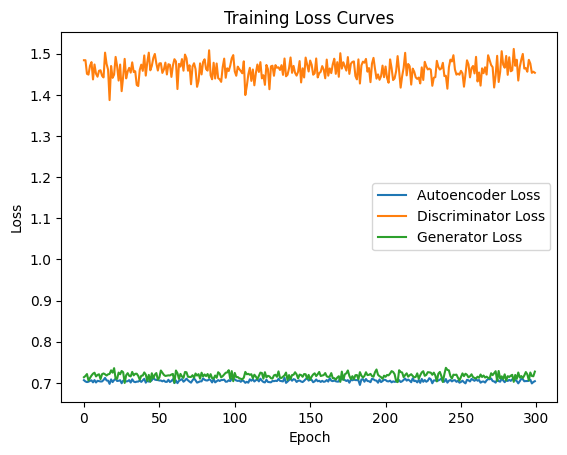

In [56]:
# --- Plot Losses ---
plt.plot(ae_losses, label='Autoencoder Loss')
plt.plot(d_losses, label='Discriminator Loss')
plt.plot(g_losses, label='Generator Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss Curves")
plt.show()